# Approximating sine function with NN

## Imports

In [40]:
import matplotlib.pylab as plt
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [4]:
from matplotlib import style
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_465/3711447307.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Generate trainig data

### Generate true function

In [5]:
x = np.linspace(-np.pi, np.pi, 201)
y = np.sin(x)

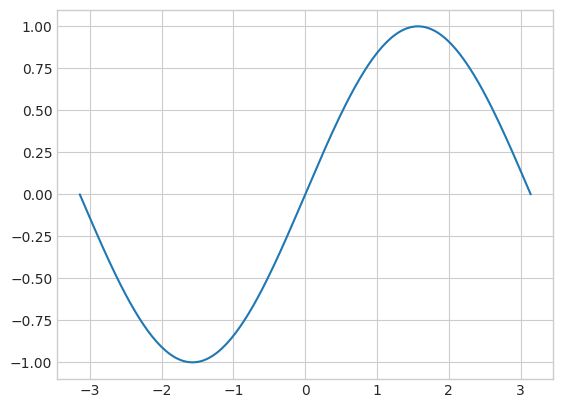

In [6]:
plt.plot(x, y)
plt.show()

### Sample data

In [199]:
n = 20
indices = np.random.choice(x.shape[0], n, replace=False)

In [200]:
x_train = x[indices]
y_train = y[indices]

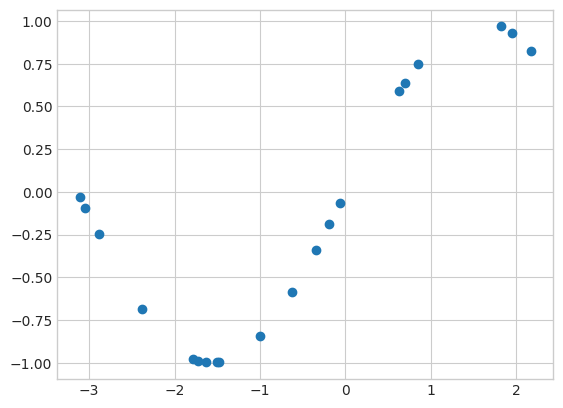

In [201]:
plt.scatter(x_train, y_train)
plt.show()

### Create DataLoader

In [202]:
tensor_x = Variable(torch.Tensor(x_train), requires_grad=True) # transform to torch tensor with AutoGrad
tensor_y = Variable(torch.Tensor(y_train), requires_grad=True)

batch_size = 1

my_dataset = TensorDataset(tensor_x, tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

## Approximate function with NN

## Define model

In [206]:
layers = [8, 4, 2, 2]

model = nn.Sequential(
    nn.Linear(1, layers[0]),
    nn.ReLU(),
    nn.Linear(layers[0], layers[1]),
    nn.ReLU(),
    # nn.Linear(layers[1], layers[2]),
    # nn.ReLU(),
    # nn.Linear(layers[2], layers[3]),
    # nn.ReLU(),
    nn.Linear(layers[1], 1),
)

criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

### Trainig loop
[Link](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_feedforward_neuralnetwork/#step-7-train-model)

In [207]:
epochs = 2000

iter = 0
for epoch in range(epochs):
    for x_i, y_i in my_dataloader:

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(x_i.reshape((-1,1)))

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, y_i)
        
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
        
    if epoch % 1000 == 0:
        print(f"{epoch}/{epochs}")
        

/home/vscode/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0/2000
1000/2000


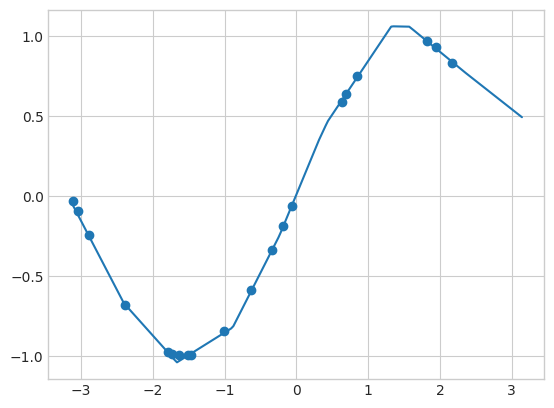

In [208]:
x_test = torch.Tensor(x)
with torch.no_grad():

    y_pred = model(x_test.reshape(-1,1))
    plt.scatter(x_train, y_train)
    plt.plot(x, y_pred)
    plt.show()
    
